# Laptop Prize Prediction
This file contains project : Laptop Prize Prediction Using Machine Learning
In this Project we are using Laptop data 
## Problem Statement
In an electroic market it is easy to get tricked and pay a large sum of money for a item which is not of that prize. As a student of CSE Laptop is one of the important thing to have. The Laptop prize are grenally dependent on the specs of the particular laptop so by using data like what are specs of laptop one can easily predict what is the prize of particular laptop so that buyer not get tricked into buying a laptop at wrong prize. It can also help shop owners to show the coustomer that the prize they are mentioning is right and they are not giving laptop at unfair prize.

## About Dataset
Dataset is made by using data from Amazon website. Found this Data on github (https://github.com/campusx-official/laptop-price-predictor-regression-project/blob/main/laptop_data.csv)

##### Columns of Dataset
Dataset have total 11 columns namely
- Company
- TypeName
- Inches ( Screen Size )
- Screen Resolution
- CPU
- RAM
- Memory
- GPU
- OS
- Weight
- Prize

## Importing Libraries and Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
# Common Libs
%matplotlib inline

In [2]:
## Model related extra imports
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [3]:
# Model Imports
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Data Collection

In [4]:
# Loading Data
laptopdata = pd.read_csv("laptop_data.csv")

In [5]:
# Checking wheather Data is loaded or not
laptopdata.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [6]:
laptopdata.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [7]:
laptopdata.sample(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1270,1270,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
809,809,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,Nvidia GeForce 920M,Windows 10,2.4kg,32447.52
991,991,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.1kg,26586.72
1276,1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,24455.52
795,795,Lenovo,2 in 1 Convertible,14.0,IPS Panel Touchscreen 2560x1440,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.42kg,124142.40


In [8]:
# Checking shape and size of dataset
laptopdata.shape

(1303, 12)

From the above we can see 
there are total 1303 laptops data here
there are total 11 needed specs and 1 extra column which is to be removed

In [9]:
laptopdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


From the above we can see there is lot of columns which are object 
hence we hace to do extensive feature engneering in the data set

## Data Analysis and Feature engneeing

In [10]:
# first lets drop unnamed column we don't need that
laptopdata.drop(columns=['Unnamed: 0'], inplace=True)

After droping lets see list of columns

In [11]:
list(laptopdata.columns)

['Company',
 'TypeName',
 'Inches',
 'ScreenResolution',
 'Cpu',
 'Ram',
 'Memory',
 'Gpu',
 'OpSys',
 'Weight',
 'Price']

### Handeling Duplicates

In [12]:
# Checking for duplicate entries
laptopdata.duplicated().sum()

29

there are duplicate entries removing them

In [13]:
laptopdata.drop_duplicates(inplace=True)

In [14]:
laptopdata.shape

(1274, 11)

After removing duplicates we have 1274 laptops left in the dataset

Lets correct the columns

In [15]:
laptopdata.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


Here we can see in Ram column GB is there if we remove that we have integer value similarly in weight column we have to remove kg

In [16]:
# Removing GB from Ram 
laptopdata["Ram"]=laptopdata['Ram'].str.replace("GB","")

In [17]:
# Removing kg from weight

laptopdata["Weight"]=laptopdata['Weight'].str.replace("kg","")

In [18]:
# Checking dataset now 
laptopdata.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [19]:
laptopdata["Ram"] = laptopdata["Ram"].astype("int32")
laptopdata["Weight"] = laptopdata["Weight"].astype("float32")

In [20]:
laptopdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


### Handeling Missing Values

In [21]:
laptopdata.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

There is no missing values in the data

### Checking data distribution

C:\Users\GAUR\AppData\Local\Temp\ipykernel_15788\2267041295.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(laptopdata["Price"])


<AxesSubplot: xlabel='Price', ylabel='Density'>

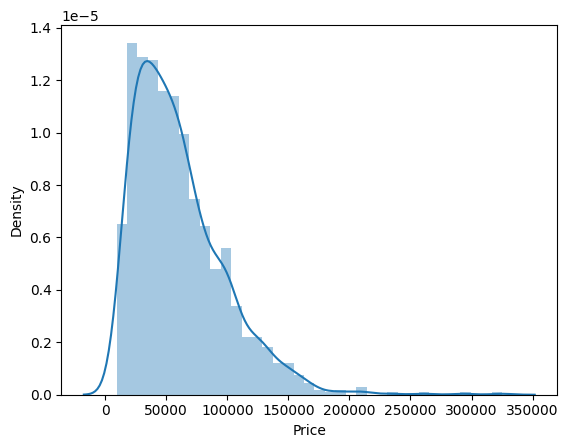

In [22]:
sb.distplot(laptopdata["Price"])

We can see the data is little skewed we have to keep that in mind

Lets check company distribution

<AxesSubplot: >

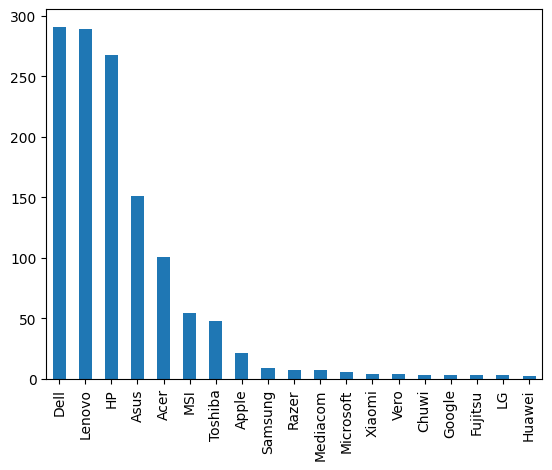

In [23]:
laptopdata["Company"].value_counts().plot(kind = "bar")

We can see the popular companies laptop are here in most value

Lets see average company laptop prize 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

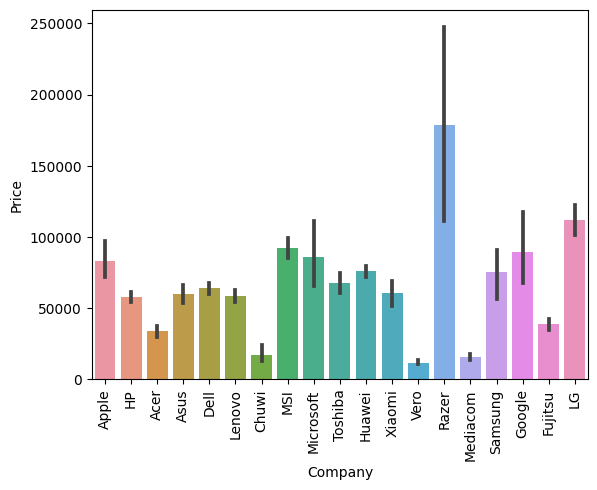

In [24]:
sb.barplot(x = laptopdata["Company"], y = laptopdata["Price"])
plt.xticks(rotation = "vertical")

How Many types of laptop?


<AxesSubplot: >

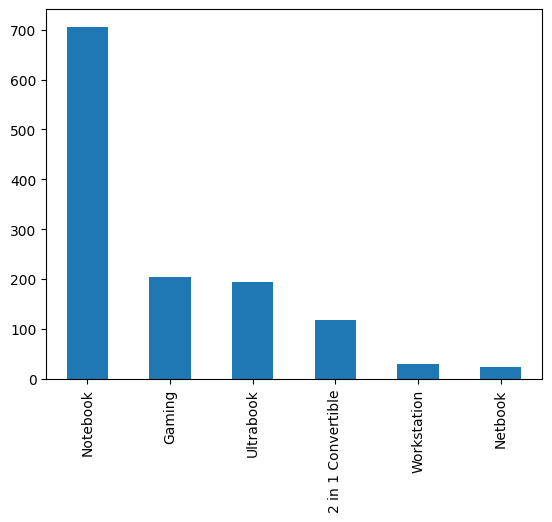

In [25]:
laptopdata["TypeName"].value_counts().plot(kind = "bar")

average prize of each type

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

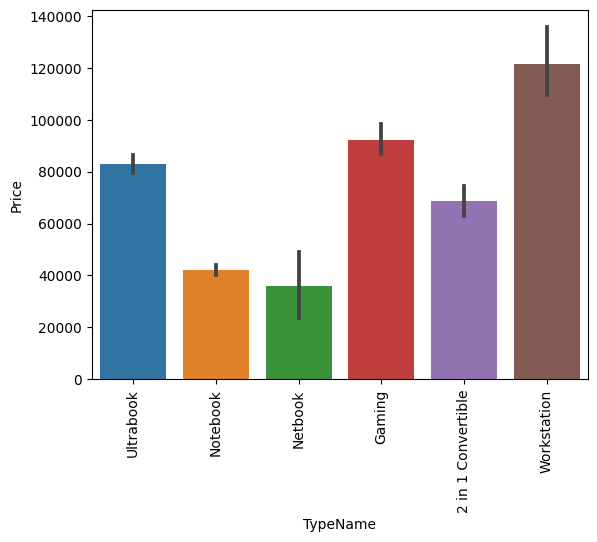

In [26]:
sb.barplot(x = laptopdata["TypeName"], y = laptopdata["Price"])
plt.xticks(rotation = "vertical")

Is there any relation ship between screen size and prize?

(array([ 8., 10., 12., 14., 16., 18., 20.]),
 [Text(8.0, 0, '8'),
  Text(10.0, 0, '10'),
  Text(12.0, 0, '12'),
  Text(14.0, 0, '14'),
  Text(16.0, 0, '16'),
  Text(18.0, 0, '18'),
  Text(20.0, 0, '20')])

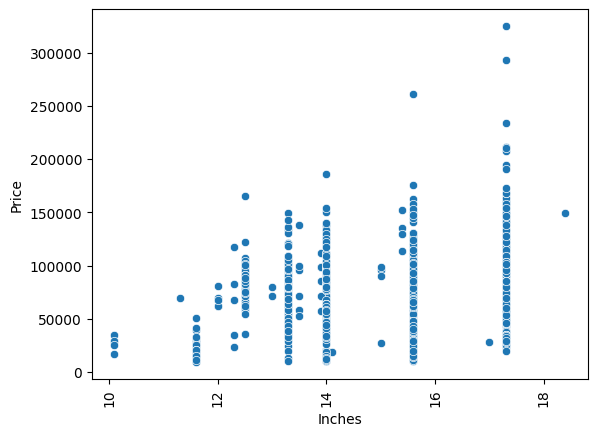

In [27]:
sb.scatterplot(x = laptopdata["Inches"], y = laptopdata["Price"])
plt.xticks(rotation = "vertical")

Lets check types of sceern reolution we have

In [28]:
laptopdata["ScreenResolution"].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

Making a new column to seprate touch screen laptops

In [29]:
laptopdata["TouchScreen"] = laptopdata["ScreenResolution"].apply(lambda x: 1 if "Touchscreen" in x else 0)

In [30]:
laptopdata.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
31,Asus,Notebook,14.0,1366x768,AMD E-Series E2-6110 1.5GHz,2,32GB Flash Storage,AMD Radeon R2,Windows 10,1.65,10602.72,0
880,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,1.28,90576.00,1
958,Dell,Ultrabook,13.3,Quad HD+ 3200x1800,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.30,67559.04,0
700,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.56,43636.32,0
1174,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Nvidia GeForce 940MX,No OS,2.20,37775.52,0


Relation of touch screen with prize

<AxesSubplot: xlabel='TouchScreen', ylabel='Price'>

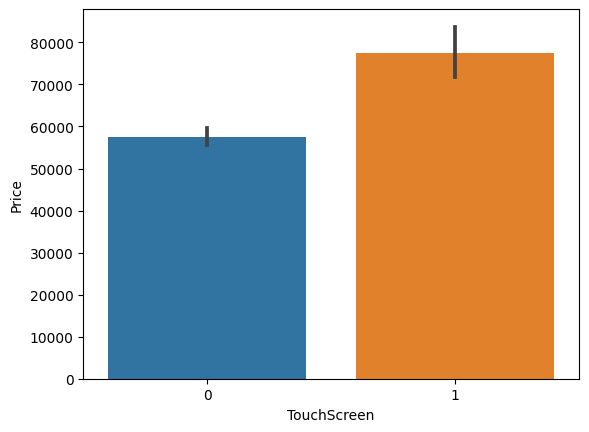

In [31]:
sb.barplot(x = laptopdata["TouchScreen"], y = laptopdata["Price"])

Touchscreen laptop prize is high 

Making new column for IPS screen

In [32]:
laptopdata["IPS"] = laptopdata["ScreenResolution"].apply(lambda x: 1 if "IPS" in x else 0)

In [33]:
laptopdata.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
988,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36,39906.72,0,0
1089,Acer,Notebook,15.6,1366x768,AMD A8-Series 7410 2.2GHz,4,500GB HDD,AMD Radeon R5,Windows 10,2.40,20619.36,0,0
535,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,1.93,72940.32,0,0
1099,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.30,122490.72,0,1
134,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.05,31861.44,0,0


Relation of IPS with Prize

<AxesSubplot: xlabel='IPS', ylabel='Price'>

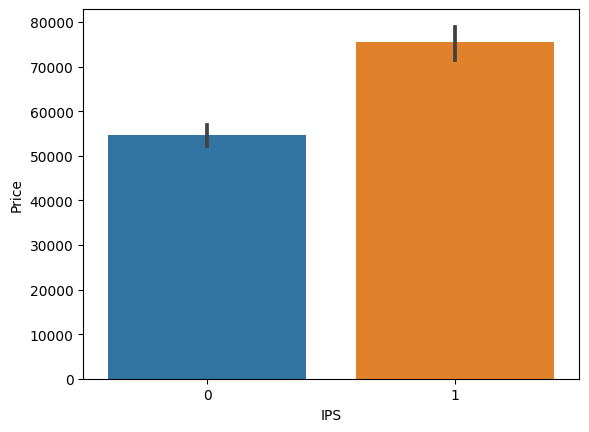

In [34]:
sb.barplot(x = laptopdata["IPS"], y = laptopdata["Price"])

Screen having IPS panel prize is high

In [35]:
new = laptopdata['ScreenResolution'].str.split('x',n=1,expand=True)
laptopdata['X_res'] = new[0]
laptopdata['Y_res'] = new[1]
laptopdata['X_res'] = laptopdata['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [36]:
laptopdata.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
1143,HP,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia Quadro M1000M,Windows 7,2.59,118761.12,0,1,1920,1080
1064,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,102777.12,0,0,1920,1080
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0,1920,1080
571,HP,Notebook,14.0,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,1.94,20725.92,0,0,1366,768
1225,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,16463.52,0,0,1366,768


In [37]:
laptopdata['X_res'] = laptopdata['X_res'].astype('int')
laptopdata['Y_res'] = laptopdata['Y_res'].astype('int')

In [38]:
laptopdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_res             1274 non-null   int32  
 14  Y_res             1274 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 139.3+ KB


Making a new column pixel per inches

In [39]:
laptopdata["PPI"] = ((((laptopdata["X_res"]**2)+(laptopdata["Y_res"]**2))**0.5)/laptopdata["Inches"]).astype("float")

In [40]:
laptopdata.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


Removing Some unwanted columns

In [41]:
laptopdata.drop(columns=["ScreenResolution","X_res","Y_res","Inches"], inplace =True)

Lets work on CPU column now

In [42]:
laptopdata["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

From the above we can extract some info from first 3 words of the cpu column

In [43]:
laptopdata['Cpu Name'] = laptopdata['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

We still have lots of diffrent processor we are dividing them in some categories

In [44]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [45]:
laptopdata['Cpu brand'] = laptopdata['Cpu Name'].apply(fetch_processor)

In [46]:
laptopdata.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu Name,Cpu brand
664,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.70,79215.1056,0,0,127.335675,Intel Core i7,Intel Core i7
958,Dell,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.30,67559.0400,0,0,276.053530,Intel Core i7,Intel Core i7
1059,MSI,Gaming,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.94,96916.3200,0,0,141.211998,Intel Core i7,Intel Core i7
484,Lenovo,Notebook,Intel Core i3 6006U 2.0GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.30,30103.2000,0,0,100.454670,Intel Core i3,Intel Core i3
385,Lenovo,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.13,121584.9600,0,1,209.800683,Intel Core i7,Intel Core i7


<AxesSubplot: >

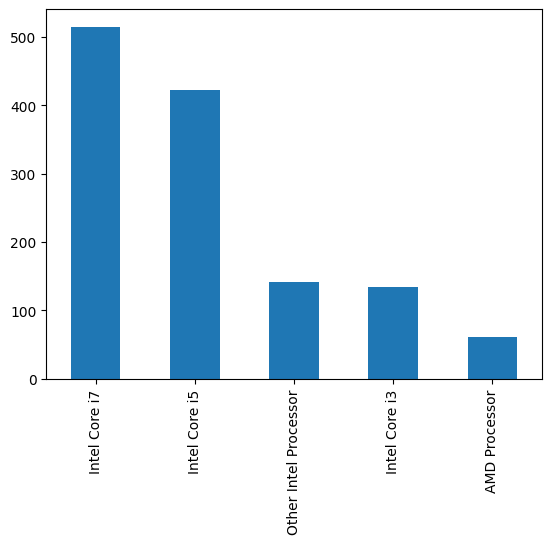

In [47]:
laptopdata['Cpu brand'].value_counts().plot(kind='bar')

Lets processor brand realtion with prize

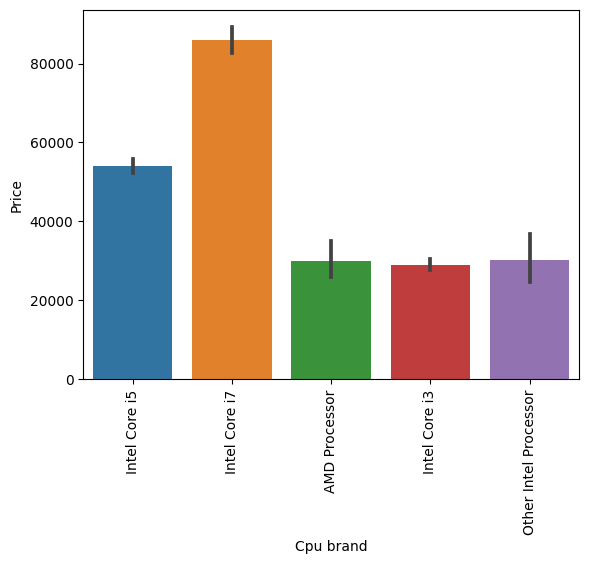

In [48]:
sb.barplot(x=laptopdata['Cpu brand'],y=laptopdata['Price'])
plt.xticks(rotation='vertical')
plt.show()

Removing unwanted columns

In [49]:
laptopdata.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [50]:
laptopdata.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand
614,Dell,Notebook,4,500GB HDD,Intel HD Graphics 620,Linux,1.93,46300.3200,0,0,100.454670,Intel Core i5
1064,MSI,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,102777.1200,0,0,141.211998,Intel Core i7
270,Apple,Ultrabook,8,512GB SSD,Intel Iris Graphics 550,macOS,1.37,104370.1920,0,1,226.983005,Intel Core i5
1267,Dell,Notebook,8,1TB HDD,AMD Radeon R5 M430,Linux,2.30,42943.1472,0,0,100.454670,Intel Core i7
471,HP,Notebook,8,500GB HDD,AMD FirePro W4190M,Windows 10,1.90,61485.1200,0,0,141.211998,Intel Core i5


Now working on Ram

<AxesSubplot: >

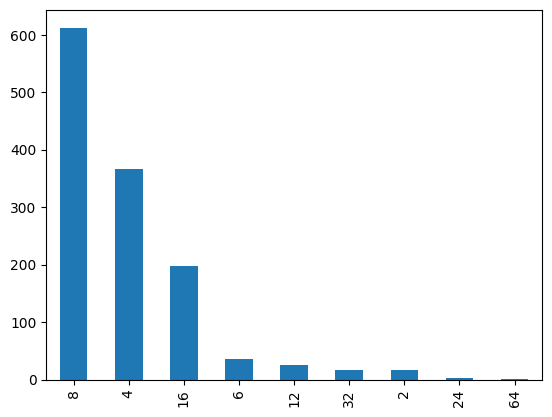

In [51]:
laptopdata['Ram'].value_counts().plot(kind='bar')

Relation of ram with Prize

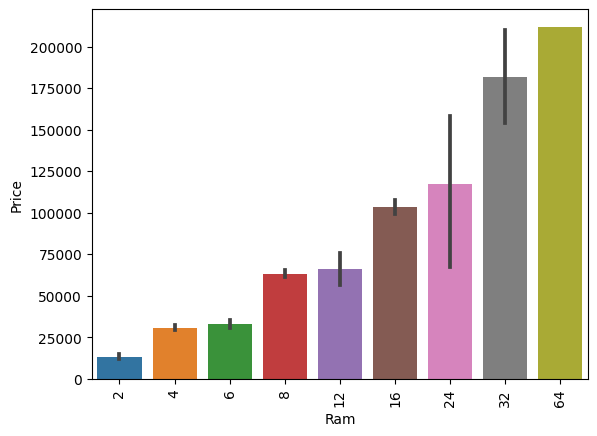

In [52]:
sb.barplot(x=laptopdata['Ram'],y=laptopdata['Price'])
plt.xticks(rotation='vertical')
plt.show()

Now we work on Memory Column

In [53]:
laptopdata['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

As there are lots of diffrent memory so we have to segregate it with our needs

In [54]:
laptopdata['Memory'] = laptopdata['Memory'].astype(str).replace('\.0', '', regex=True)
laptopdata["Memory"] = laptopdata["Memory"].str.replace('GB', '')
laptopdata["Memory"] = laptopdata["Memory"].str.replace('TB', '000')
new = laptopdata["Memory"].str.split("+", n = 1, expand = True)

laptopdata["first"]= new[0]
laptopdata["first"]=laptopdata["first"].str.strip()

laptopdata["second"]= new[1]

laptopdata["Layer1HDD"] = laptopdata["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptopdata["Layer1SSD"] = laptopdata["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptopdata["Layer1Hybrid"] = laptopdata["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptopdata["Layer1Flash_Storage"] = laptopdata["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptopdata['first'] = laptopdata['first'].str.replace(r'\D', '')

laptopdata["second"].fillna("0", inplace = True)

laptopdata["Layer2HDD"] = laptopdata["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptopdata["Layer2SSD"] = laptopdata["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptopdata["Layer2Hybrid"] = laptopdata["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptopdata["Layer2Flash_Storage"] = laptopdata["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

laptopdata['second'] = laptopdata['second'].str.replace(r'\D', '')

laptopdata["first"] = laptopdata["first"].astype(int)
laptopdata["second"] = laptopdata["second"].astype(int)

laptopdata["HDD"]=(laptopdata["first"]*laptopdata["Layer1HDD"]+laptopdata["second"]*laptopdata["Layer2HDD"])
laptopdata["SSD"]=(laptopdata["first"]*laptopdata["Layer1SSD"]+laptopdata["second"]*laptopdata["Layer2SSD"])
laptopdata["Hybrid"]=(laptopdata["first"]*laptopdata["Layer1Hybrid"]+laptopdata["second"]*laptopdata["Layer2Hybrid"])
laptopdata["Flash_Storage"]=(laptopdata["first"]*laptopdata["Layer1Flash_Storage"]+laptopdata["second"]*laptopdata["Layer2Flash_Storage"])

laptopdata.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

C:\Users\GAUR\AppData\Local\Temp\ipykernel_15788\2424242588.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  laptopdata['first'] = laptopdata['first'].str.replace(r'\D', '')
C:\Users\GAUR\AppData\Local\Temp\ipykernel_15788\2424242588.py:25: FutureWarning: The default value of regex will change from True to False in a future version.
  laptopdata['second'] = laptopdata['second'].str.replace(r'\D', '')


In [55]:
laptopdata.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1118,Toshiba,Ultrabook,16,512 SSD,Intel HD Graphics 620,Windows 10,1.05,118601.28,0,0,165.632118,Intel Core i7,0,512,0,0
1248,Lenovo,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,2.30,30529.44,0,1,141.211998,Intel Core i5,0,256,0,0
254,Acer,Notebook,4,256 SSD,Nvidia GeForce MX130,Windows 10,3.00,37402.56,0,1,127.335675,Intel Core i3,0,256,0,0
1027,HP,Notebook,4,500 HDD,Intel HD Graphics 620,Windows 10,1.95,56476.80,0,0,111.935204,Intel Core i5,500,0,0,0
267,Lenovo,Notebook,4,1000 HDD,Intel HD Graphics 620,No OS,2.20,24881.76,0,0,141.211998,Intel Core i5,1000,0,0,0


In [56]:
# droping memory as its saved in other columns
laptopdata.drop(columns=['Memory'],inplace=True)

In [57]:
laptopdata.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
842,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,2.63,48484.8000,0,0,106.113062,Intel Core i5,1000,0,0,0
1051,HP,Notebook,8,Nvidia GeForce 940MX,Windows 10,1.91,52161.1200,0,1,141.211998,Intel Core i7,1000,0,0,0
611,Dell,Gaming,16,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59,46833.6528,0,0,141.211998,Intel Core i7,1000,0,0,0
582,HP,Notebook,4,Intel HD Graphics 620,Windows 10,1.49,38308.3200,0,0,165.632118,Intel Core i3,0,128,0,0
140,Acer,Notebook,4,Nvidia GeForce MX130,Windows 10,3.00,34898.4000,0,1,127.335675,Intel Core i3,1000,0,0,0


Now lets check which columns are unnnessary here by using correlation between columns

In [58]:
laptopdata.corr()["Price"]

C:\Users\GAUR\AppData\Local\Temp\ipykernel_15788\3207775376.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  laptopdata.corr()["Price"]


Ram              0.740106
Weight           0.212192
Price            1.000000
TouchScreen      0.188631
IPS              0.250358
PPI              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

Droping column with less than 0.05 correlation

In [59]:
laptopdata.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [60]:
laptopdata.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD
402,Lenovo,Notebook,8,AMD Radeon RX 550,Windows 10,2.100,60978.96,0,1,141.211998,Intel Core i5,1000,256
441,Dell,Notebook,4,AMD Radeon 530,Windows 10,2.200,39906.72,0,0,141.211998,Intel Core i5,0,256
235,Dell,Notebook,16,AMD Radeon R7 M445,Linux,2.360,47898.72,0,0,141.211998,Intel Core i7,0,256
316,HP,2 in 1 Convertible,16,Intel UHD Graphics 620,Windows 10,1.290,130482.72,1,1,331.264236,Intel Core i7,0,1000
1213,Dell,2 in 1 Convertible,8,Intel HD Graphics 620,Windows 10,2.191,53226.72,1,1,141.211998,Intel Core i5,0,256


Lets work on GPU now

In [61]:
laptopdata["Gpu"].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

there are lots of diffrent categories hence we will tore only the compnay GPU belongs to

In [62]:
laptopdata['Gpu brand'] = laptopdata['Gpu'].apply(lambda x:x.split()[0])

In [63]:
laptopdata.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
77,Dell,Notebook,8,Intel UHD Graphics 620,Windows 10,2.02,45554.400,0,0,141.211998,Intel Core i7,1000,128,Intel
559,Dell,Notebook,4,AMD Radeon R5 M420,Windows 10,2.18,32921.712,0,0,100.454670,Intel Core i3,1000,0,AMD
1247,Asus,Gaming,16,Nvidia GeForce GTX 1070,Windows 10,2.34,123876.000,0,1,141.211998,Intel Core i7,1000,256,Nvidia
1156,MSI,Gaming,16,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,79536.384,0,0,127.335675,Intel Core i7,1000,256,Nvidia
1022,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.11,61218.720,0,1,165.632118,Intel Core i5,0,256,Intel


In [64]:
laptopdata['Gpu brand'].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu brand, dtype: int64

lets drop ARM as its only one laptop

In [65]:
laptopdata = laptopdata[laptopdata['Gpu brand'] != 'ARM']

In [66]:
laptopdata['Gpu brand'].value_counts()

Intel     703
Nvidia    396
AMD       174
Name: Gpu brand, dtype: int64

Relation of price and gpu brand

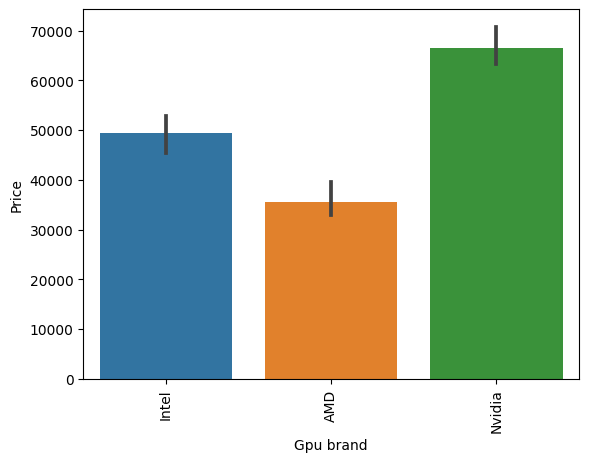

In [67]:
sb.barplot(x=laptopdata['Gpu brand'],y=laptopdata['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
#Droping GPu column now
laptopdata.drop(columns=["Gpu"],inplace=True)

In [69]:
laptopdata.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
1205,Dell,Notebook,8,Windows 10,2.360,47365.92,0,0,141.211998,Intel Core i5,0,256,AMD
73,MSI,Gaming,8,Windows 10,2.700,58341.60,0,0,127.335675,Intel Core i5,1000,128,Nvidia
70,Microsoft,Ultrabook,4,Windows 10 S,1.252,58021.92,1,0,200.842560,Intel Core i5,0,128,Intel
218,Dell,Ultrabook,8,Windows 10,1.600,61218.72,0,0,157.350512,Intel Core i5,0,256,Intel
454,Dell,Notebook,8,Windows 10,2.360,52161.12,0,0,141.211998,Intel Core i7,1000,128,AMD


Now working on OS

In [70]:
laptopdata['OpSys'].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

there are lots of different categories 

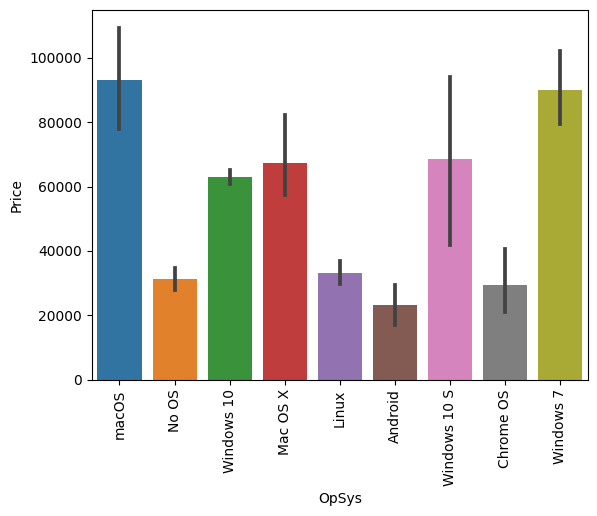

In [71]:
sb.barplot(x=laptopdata['OpSys'],y=laptopdata['Price'])
plt.xticks(rotation='vertical')
plt.show()

Now we can see that in relation to price we can divide them in 3 categories

In [72]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [73]:
laptopdata['os'] = laptopdata['OpSys'].apply(cat_os)

In [74]:
laptopdata.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
116,HP,Notebook,8,Windows 10,1.63,57755.52,0,0,157.350512,Intel Core i7,0,512,Intel,Windows
82,HP,Notebook,8,Windows 10,1.63,45820.80,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
449,Microsoft,Ultrabook,16,Windows 10 S,1.25,137941.92,1,0,200.842560,Intel Core i7,0,512,Intel,Windows
380,HP,Gaming,8,Windows 10,3.35,63456.48,0,1,127.335675,Intel Core i7,1000,128,Nvidia,Windows
352,MSI,Gaming,8,Windows 10,2.70,75071.52,0,0,127.335675,Intel Core i7,1000,128,Nvidia,Windows


In [75]:
# droping Opsys column
laptopdata.drop(columns=['OpSys'],inplace=True)

In [76]:
laptopdata.sample(5)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
1084,Dell,Notebook,8,2.18,39960.00,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
870,Lenovo,Notebook,4,2.38,56210.40,0,0,100.454670,Intel Core i5,500,0,Intel,Windows
145,Asus,Ultrabook,8,1.25,58554.72,0,0,157.350512,Intel Core i7,0,256,Intel,Windows
717,Lenovo,Notebook,4,2.19,15877.44,0,0,100.454670,AMD Processor,500,0,AMD,Windows
1009,HP,Notebook,4,1.64,36443.52,0,0,111.935204,Intel Core i3,500,0,Intel,Windows


Realtion of os with price

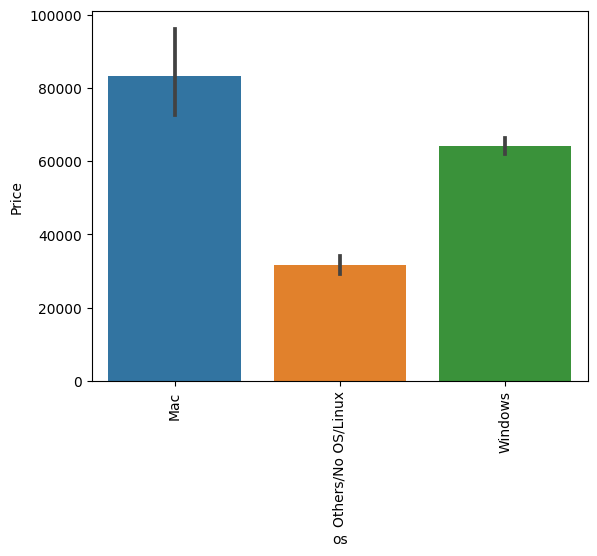

In [77]:
sb.barplot(x=laptopdata['os'],y=laptopdata['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Correlation

C:\Users\GAUR\AppData\Local\Temp\ipykernel_15788\3346801576.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = laptopdata.corr()


<AxesSubplot: >

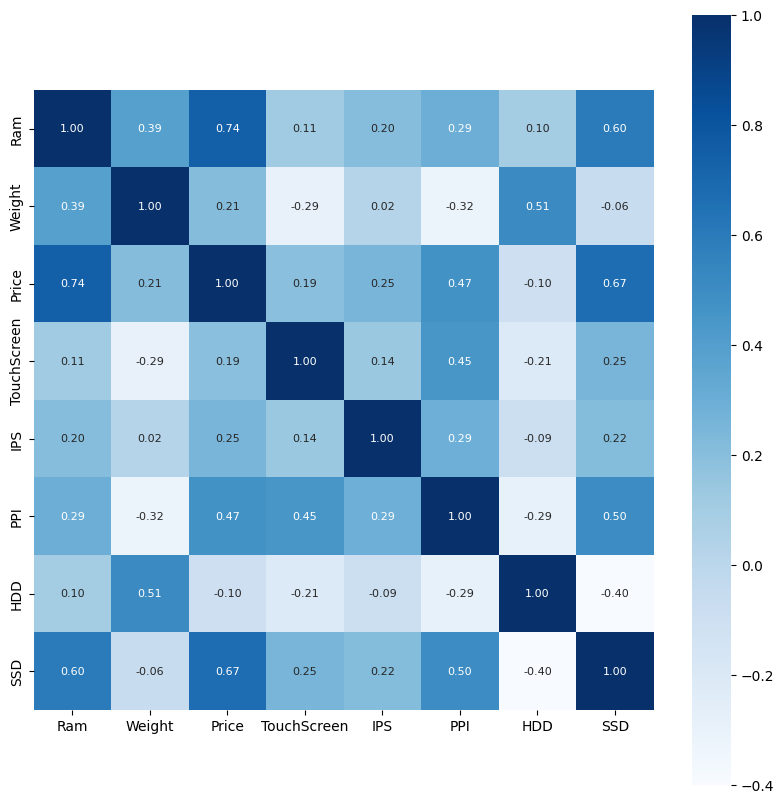

In [78]:
correlation = laptopdata.corr()
plt.figure(figsize=(10,10))
sb.heatmap(correlation, cbar=True, square=True, fmt = '.2f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

## Seprating Data and label

As we know from starting our price column data is somewhat skewed hence we will do log of whole column while preparing for the models

C:\Users\GAUR\AppData\Local\Temp\ipykernel_15788\4066916704.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(laptopdata["Price"])


<AxesSubplot: xlabel='Price', ylabel='Density'>

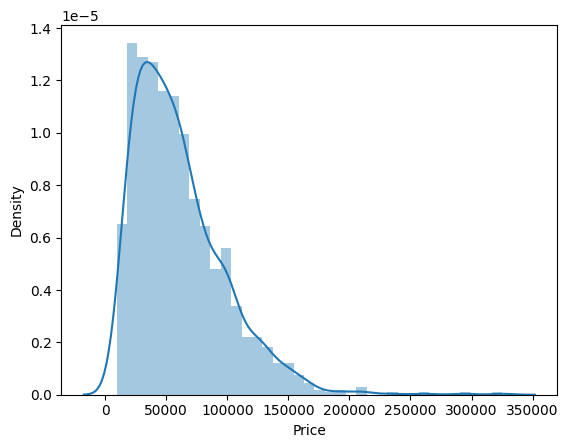

In [79]:
# Our current target column looks like 
sb.distplot(laptopdata["Price"])

It is skewed to the left we can correct it by taking Log of the whole column

C:\Users\GAUR\AppData\Local\Temp\ipykernel_15788\2815795290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(np.log(laptopdata["Price"]))


<AxesSubplot: xlabel='Price', ylabel='Density'>

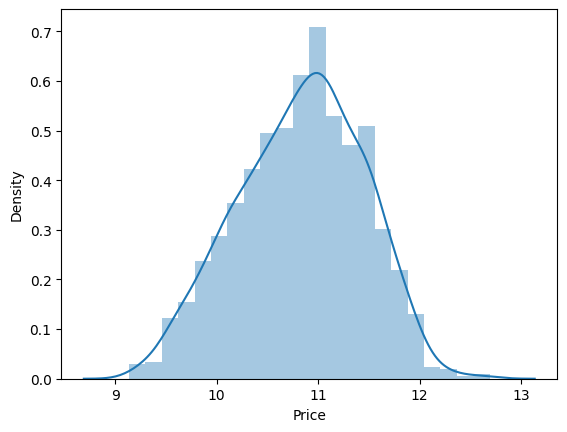

In [80]:
# our data after we take log of the target
sb.distplot(np.log(laptopdata["Price"]))

we have to keep in mind to return exponent of the value which we recive from the model to the user

Y(Label): Value to be predicted ie Price

X(Data): Data used to predict Y

In [81]:
X = laptopdata.drop(columns=['Price'])
Y = np.log(laptopdata["Price"])

In [82]:
X.sample(5)

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,os
261,Lenovo,Notebook,4,2.20,0,0,141.211998,Intel Core i3,0,256,Intel,Others/No OS/Linux
1010,Dell,Gaming,8,2.65,0,0,141.211998,Intel Core i5,0,0,Nvidia,Windows
1186,Dell,2 in 1 Convertible,16,2.09,1,0,141.211998,Intel Core i7,0,512,Intel,Windows
431,Lenovo,Notebook,8,1.40,0,1,165.632118,Intel Core i7,0,256,Intel,Windows
512,Dell,Notebook,8,2.18,0,0,141.211998,Intel Core i5,1000,0,Intel,Windows


In [83]:
Y.sample(5)

508    11.163218
100    10.553422
829    10.403666
844    11.509255
109    11.275358
Name: Price, dtype: float64

## Train Test Split

In [84]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [85]:
print(X.shape, X_test.shape,X_train.shape)

(1273, 12) (255, 12) (1018, 12)


## Model Selection, Model trainging and Model evaluation

### Linear regression

In [86]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8330231503845467
MAE 0.20127426339574583


### Ridge Regression

In [87]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8288776701362148
MAE 0.2045896536168517


### Lasso Regression

In [88]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8293697200868031
MAE 0.20408238215818852


### KNN

In [89]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7940365687659441
MAE 0.20896206346342375


### Decision Tree

In [90]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7807524639205963
MAE 0.22266284048218876


### SVM

In [91]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))


R2 score 0.7371347218300816
MAE 0.21426868314643516


### Random forest

In [93]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))



R2 score 0.8773596879482614
MAE 0.1625629300989986


## Making Pickel file from Model

In [94]:
# pickel import